https://www.kaggle.com/c/dogs-vs-cats/data

USING A PRETAINED MODEL TO CLASSIFY BETWEEN CATS AND DOGS
WE WILL BE USING THE VGG16 MODEL TO CLASSIFY

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from PIL import Image
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

Extract the contents of train.zip file inside dogs-vs-cats.zip into /data/train/

In [8]:
# Organize data into train, valid, test dirs

os.chdir('data/train/')
# os.system('ls')
if os.path.isdir('train/dog/') is False:
    pass
    # print(random.sample(glob.glob('cat*'), 10))
    # print(glob.glob('cat*'))
    
    os.makedirs('train/dog/')
    os.makedirs('train/cat/')
    os.makedirs('valid/dog/')
    os.makedirs('valid/cat/')
    os.makedirs('test/dog/')
    os.makedirs('test/cat/')

    for i in random.sample(glob.glob('cat*'), 500):
        pass
        shutil.move(i, 'train/cat/')      
    for i in random.sample(glob.glob('dog*'), 500):
        pass
        shutil.move(i, 'train/dog/')
    for i in random.sample(glob.glob('cat*'), 100):
        pass
        shutil.move(i, 'valid/cat/')        
    for i in random.sample(glob.glob('dog*'), 100):
        pass
        shutil.move(i, 'valid/dog/')
    for i in random.sample(glob.glob('cat*'), 50):
        pass
        shutil.move(i, 'test/cat/')      
    for i in random.sample(glob.glob('dog*'), 50):
        pass
        shutil.move(i, 'test/dog/')

os.chdir('../../')

In [9]:
train_path = 'data/train/train/'
valid_path = 'data/train/valid/'
test_path = 'data/train/test/'

In [10]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


We now call next(train_batches) to generate a batch of images and labels from the training set. NOTE that the size of this batch is determined by the batch_size we set when we created train_batches.

In [11]:
imgs, labels = next(train_batches)

In [12]:
# We then use this plotting function obtained from TensorFlow's documentation to plot the processed images within our Jupyter notebook.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

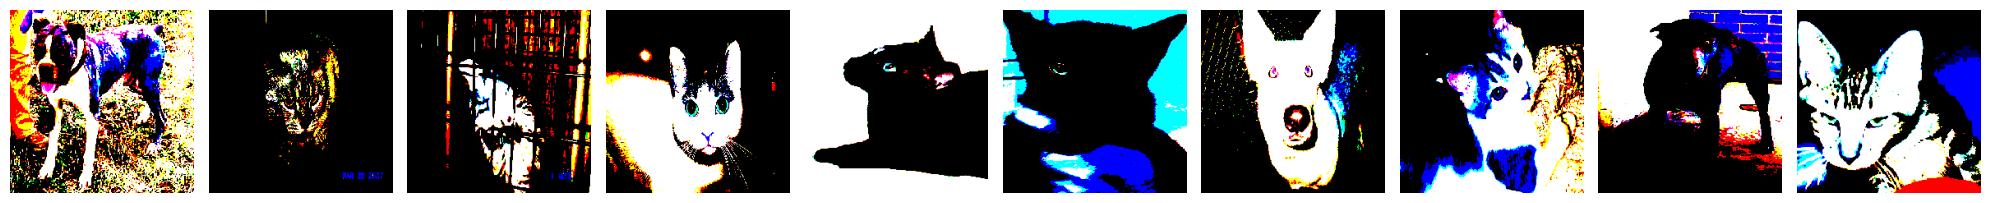

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [13]:
plotImages(imgs)
print(labels)

VGG BUILDING AND TRAINING STARTS HERE

In [14]:
# downloads the VGG16 model and imports it
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [15]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:
# initiates a sequential network with the variable: model
model = Sequential()
# interates over all the layers of the VGG16 network and adds them to the model variable
# here we are adding all the layers except the last one. this is because we only have two possible outcomes(cats & dogs), as compared to 1000 different things like cats, dogs, birds, tigers, trees, horses, cows, etc.
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [19]:
# iterates over over all the layers in the model, and marks them as non trainable.
# this is done because the VGG16 model was already pretrained to perfection(almost), and therefore we do not want to retrain the model again
for layer in model.layers:
    layer.trainable = False

In [20]:
# here we add a new softmax layer to the end, with only two possible values(cat or dog)
# also this last layer will be trainable, rest all layers are not trainable
model.add(Dense(units=2, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [22]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.fit(x=train_batches, steps_per_epoch=len(train_batches), validation_data=valid_batches, validation_steps=len(valid_batches), epochs=5, verbose=2)

Epoch 1/5
100/100 - 934s - loss: 0.2952 - accuracy: 0.8800 - val_loss: 0.2010 - val_accuracy: 0.9250 - 934s/epoch - 9s/step
Epoch 2/5
100/100 - 932s - loss: 0.0885 - accuracy: 0.9720 - val_loss: 0.1532 - val_accuracy: 0.9350 - 932s/epoch - 9s/step
Epoch 3/5
100/100 - 933s - loss: 0.0594 - accuracy: 0.9840 - val_loss: 0.1304 - val_accuracy: 0.9450 - 933s/epoch - 9s/step
Epoch 4/5
100/100 - 934s - loss: 0.0423 - accuracy: 0.9870 - val_loss: 0.1202 - val_accuracy: 0.9450 - 934s/epoch - 9s/step
Epoch 5/5
100/100 - 937s - loss: 0.0328 - accuracy: 0.9910 - val_loss: 0.1136 - val_accuracy: 0.9450 - 937s/epoch - 9s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

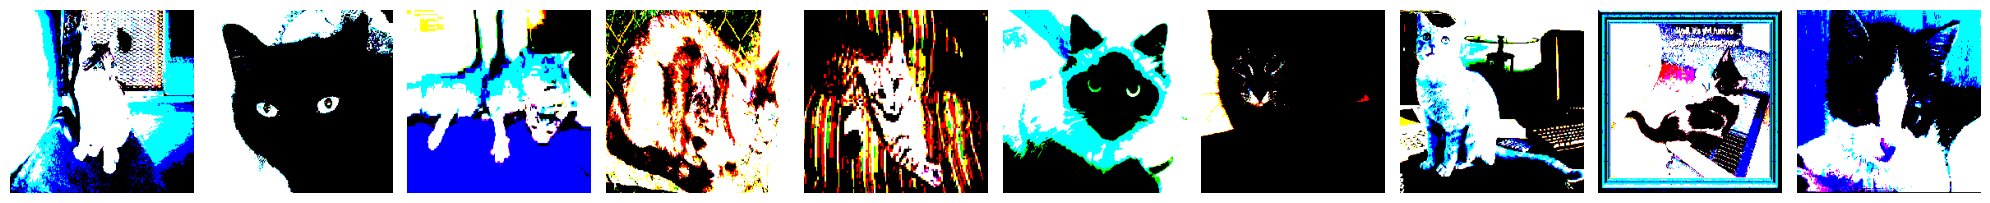

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [24]:
# loads test data
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [25]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [26]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [27]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    # This function prints and plots the confusion matrix.
    # Normalization can be applied by setting `normalize=True`.

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[50  0]
 [ 5 45]]


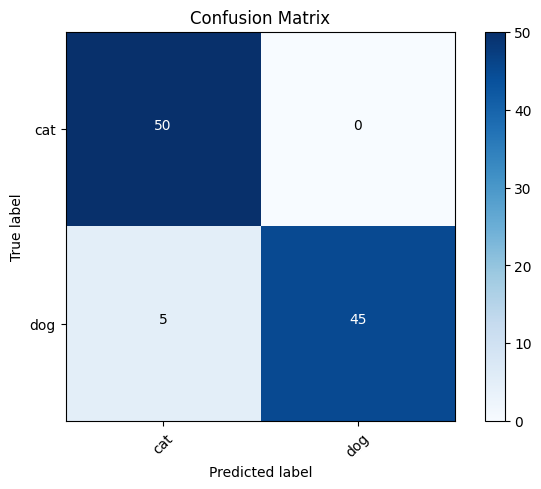

In [28]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')